In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/math-students/Math-Students.csv


## **Introduction**

**Problem Statement**

There are several factors that influence student performance in educational settings, and understanding these factors is critical for designing interventions that seek to improve academic outcomes. The Math-Students dataset provides a comprehensive view of students’ academic, demographic, and socio-behavioral attributes, with the final grade (G3) as a key indicator of success. The challenge is to predict G3 based on these attributes, enabling educators to identify at-risk students and tailor support strategies effectively.

**Objective**

The goal of this project is to develop a machine learning model that accurately predicts students’ final math grades (G3) using a combination of demographic, behavioral, and academic features. We also intend to uncover key drivers of academic performance and provide actionable insights for educational stakeholders by leveraging predictive analytics.

**Steps** 

1. **Exploratory Data Analysis (EDA):** To understand the dataset’s structure, distributions, and relationships to inform feature engineering and model selection.
2. **Data Preprocessing:** Clean and transform the data, including encoding categorical variables, scaling numerical features, and handling any anomalies.
3. **Feature Selection/Engineering:** Identify the most predictive features and create new ones to enhance model performance.
4. **Model Training:** Train multiple regression models to predict G3 and compare their performance.
5. **Model Evaluation:** Assess model performance using appropriate metrics and select the best-performing model.
6. **Hyperparameter Tuning:** Optimize the chosen model to improve predictive accuracy.
7. **Interpretation and Insights:** Analyze feature importance and model predictions to derive meaningful educational insights.

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [40]:
# load data
df = pd.read_csv('/kaggle/input/math-students/Math-Students.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [41]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      399 non-null    object
 1   sex         399 non-null    object
 2   age         399 non-null    int64 
 3   address     399 non-null    object
 4   famsize     399 non-null    object
 5   Pstatus     399 non-null    object
 6   Medu        399 non-null    int64 
 7   Fedu        399 non-null    int64 
 8   Mjob        399 non-null    object
 9   Fjob        399 non-null    object
 10  reason      399 non-null    object
 11  guardian    399 non-null    object
 12  traveltime  399 non-null    int64 
 13  studytime   399 non-null    int64 
 14  failures    399 non-null    int64 
 15  schoolsup   399 non-null    object
 16  famsup      399 non-null    object
 17  paid        399 non-null    object
 18  activities  399 non-null    object
 19  nursery     399 non-null    object
 20  higher    

In [42]:
# null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [43]:
# duplicates
df.duplicated().sum()

0

In [44]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,16.709273,2.761905,2.536341,1.443609,2.035088,0.330827,3.954887,3.233083,3.097744,1.476190,2.288221,3.558897,5.651629,10.879699,10.676692,10.380952
std,1.278225,1.096340,1.092716,0.695429,0.835020,0.740655,0.898335,0.994107,1.113178,0.887552,1.281737,1.384013,7.983113,3.315195,3.760845,4.571073
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.500000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.500000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.500000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## **Exploratory Data Analysis**

EDA is the foundation of any machine learning project. The process provides insights into the dataset’s structure, distributions, and relationships. This allows us to identify patterns, outliers, and correlations that guide preprocessing, feature engineering, and model selection. Here are the steps we will perform for this dataset

**Steps**

1. Visualize the distribution of the target variable (G3) to understand its range and shape.
2. Analyze correlations between numerical features and G3 to identify potential predictors.
3. Explore categorical variables (e.g., sex, school) to assess their impact on G3.
4. Check for outliers in numerical features like absences or grades.

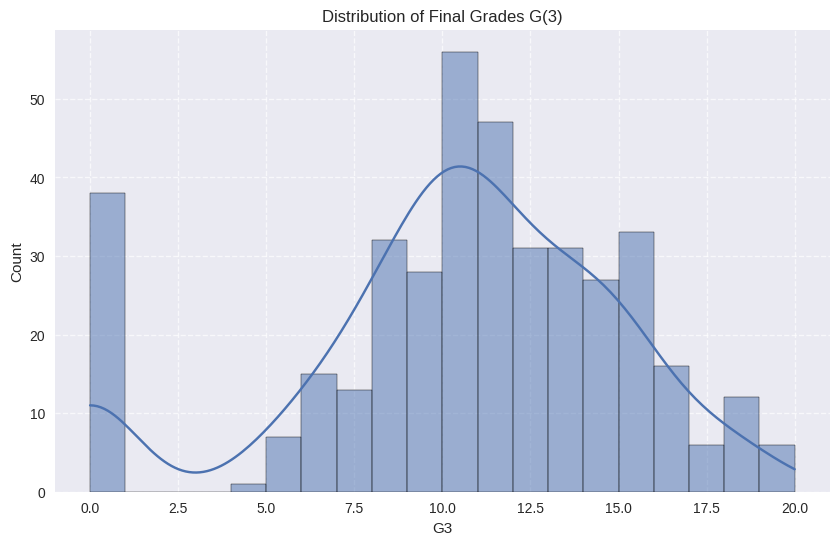

In [45]:
# Set plot style
plt.style.use('seaborn')

# Distribution of G3
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades G(3)')
plt.xlabel('G3')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

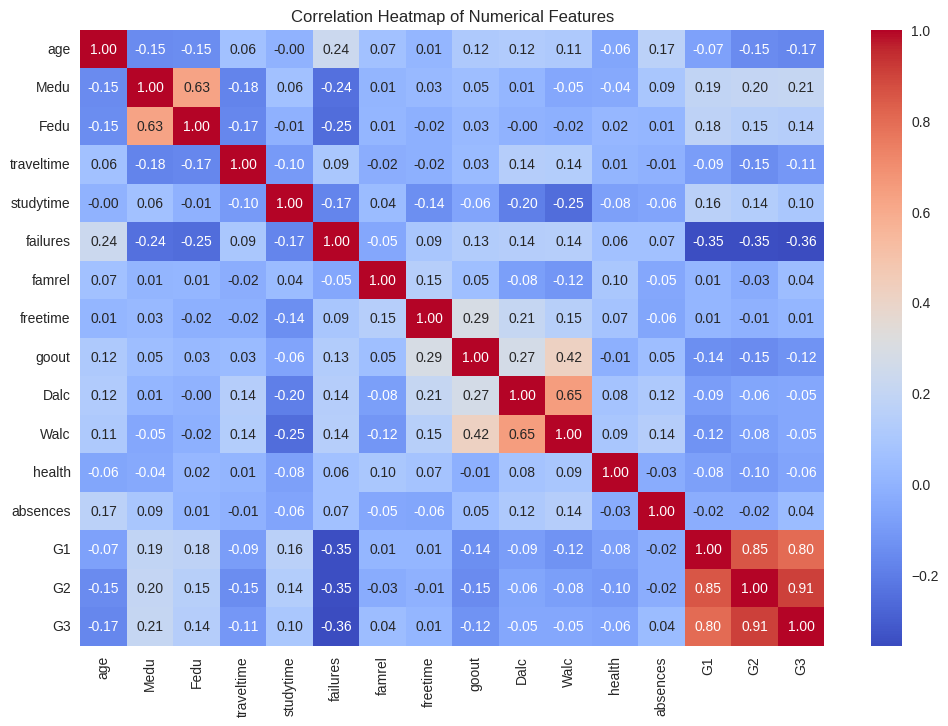

In [46]:
# Correlation heatmap of numerical features
numerical_cols = df.select_dtypes(include=['int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

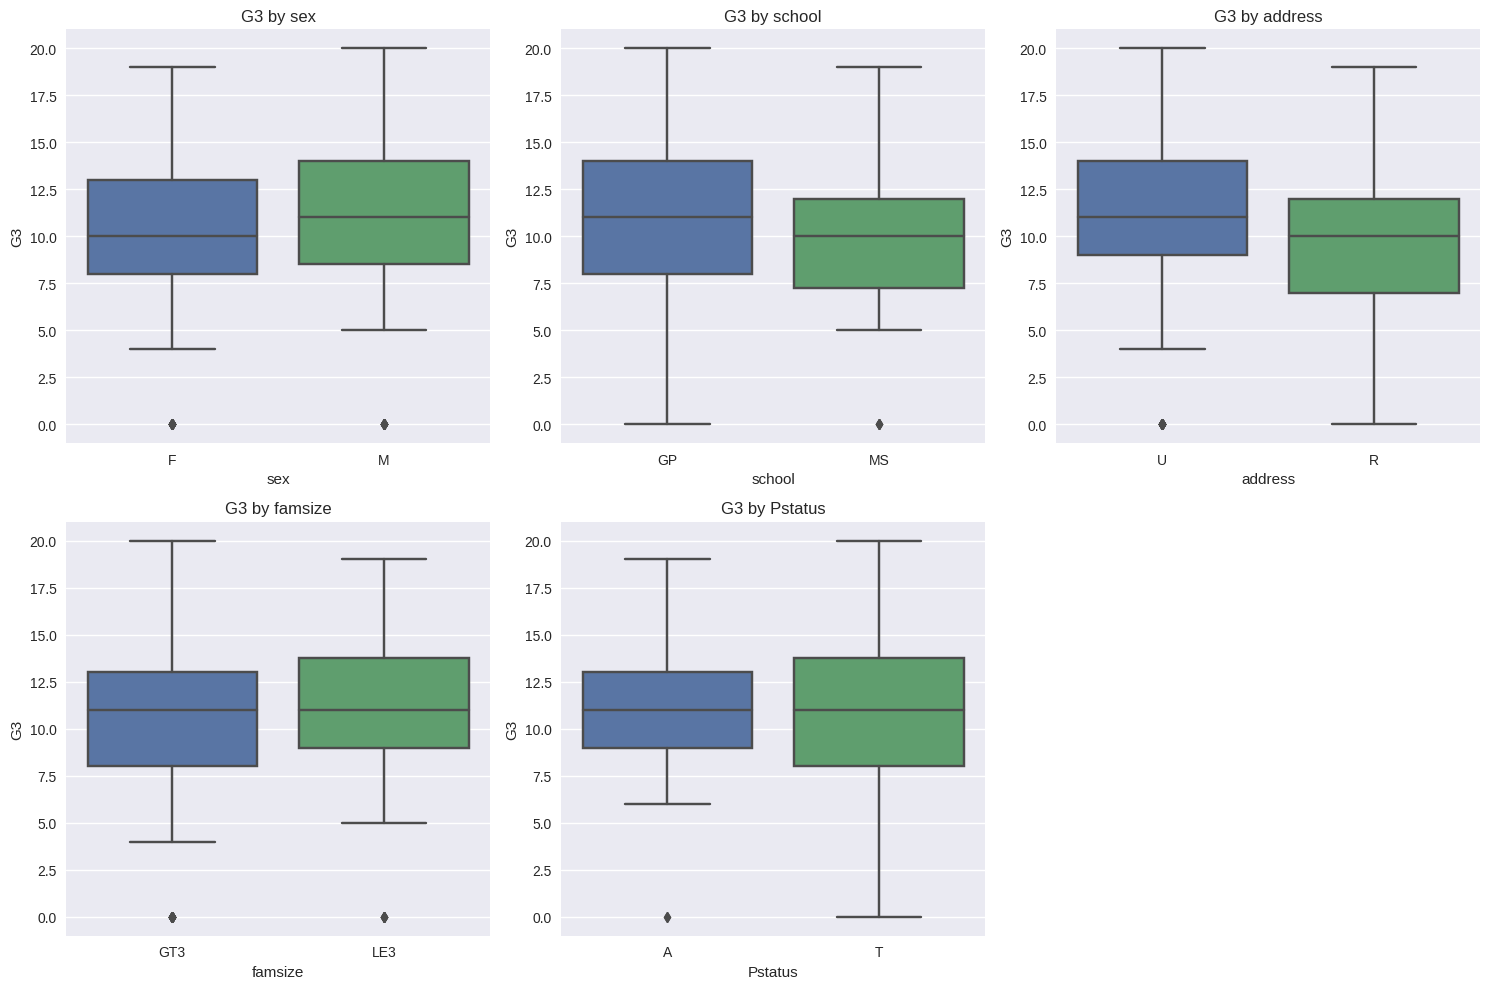

In [47]:
# Boxplots for categorical some variables vs. G3
categorical_cols = ['sex', 'school', 'address', 'famsize', 'Pstatus']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, y='G3', data=df)
    plt.title(f'G3 by {col}')
plt.tight_layout()
plt.show()

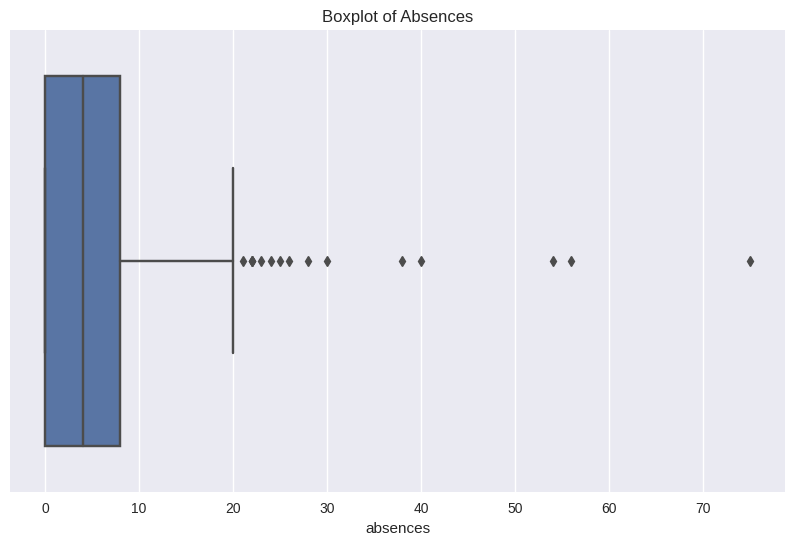

In [48]:
# Check for outliers in absences 
plt.figure(figsize=(10,6))
sns.boxplot(x=df['absences'])
plt.title('Boxplot of Absences')
plt.show()

**Analysis of EDA Results**

1. **G3 Distribution:**
    - The presence of a bar at G3=0 (around 40 students) suggests a significant number of students failed or didn’t complete the course, which could skew predictions if not handled properly.
    - The approximately normal distribution starting at G3=4 (with slight right skew) indicates most students score between 4 and 20, with a peak around 10–12. This supports regression modeling but may require addressing the zero-inflated cases separately.
    - ***Actionable Insight:*** Consider creating a binary feature for G3=0 to model failures distinctly or apply a transformation to handle the zero-inflation.
2. Correlation Heatmap:
    - **Strong Positive Correlations:** G2 (0.91) and G1 (0.80) with G3 confirm that prior academic performance is the strongest predictor of final grades. These features will likely dominate model predictions.
    - **Negative Correlations:** Past failures (-0.35 to -0.36) stand out as the most detrimental factor, followed by going out (-0.12 to -0.15) and alcohol consumption (Dalc/Walc, -0.05 to -0.12). These suggest lifestyle factors play a role, though less impactful than academic history.
    - **Parental Education:** Medu (0.18–0.21) and Fedu (0.14–0.21) show moderate positive effects, but their high correlation (0.63) indicates potential multicollinearity. Study time (0.10–0.16) has a modest positive effect, worth retaining.
    - **Multicollinearity Concerns:** High correlations between Medu–Fedu and Dalc–Walc suggest we may need to combine or drop one of each pair to avoid redundancy. G1–G2–G3 correlations are expected but may overshadow other features.
    - **Weak Predictors:** Health, absences, and family relationships show negligible correlations with G3, suggesting they may contribute little to predictions unless engineered differently.
    - ***Actionable Insight:*** Prioritize G1, G2, and failures as key features. Consider dropping either Medu or Fedu and Dalc or Walc after further analysis. Absences and health may need feature engineering to capture non-linear effects.
3. **Boxplots (Categorical Variables vs. G3):**
    - **Sex:** Similar metrics (mean, median) for males and females with one outlier each suggest sex has minimal impact on G3, though outliers may indicate exceptional cases worth investigating.
    - **School:** Similar means but larger interquartile range for GP suggests greater variability in performance at Gabriel Pereira, potentially due to differing teaching methods or student demographics.
    - **Address:** Rural (R) students have a lower minimum G3, hinting at potential challenges (e.g., longer travel times), but similar means suggest limited overall impact.
    - **Family Size:** Nearly identical metrics with one outlier each indicate family size is unlikely to be a strong predictor.
    - **Parental Status:** Larger interquartile range for together (T) vs. apart (A) suggests more variability when parents cohabitate, but similar means and one outlier in A limit its predictive power.
    - **Actionable Insight:** Categorical variables like sex, famsize, and Pstatus show limited differentiation in G3, suggesting they may not be critical predictors unless combined with other features (e.g., interaction terms). School and address warrant further exploration due to variability.
4. **Outliers in Absences:**
    - Around 13 outliers, mostly between 20–30, with a few at 40, 55, and one at 75, indicate some students have unusually high absenteeism. These could distort model predictions if not addressed.
    - The majority of absences are low (median ~4 from df.describe()), so outliers may represent exceptional cases (e.g., health issues or disengagement).
    - ***Actionable Insight:*** Cap or transform absences (e.g., log transformation) to reduce the impact of extreme values, or create a binary feature for high absences (>20).

## **Data Preprocessing**

Preprocessing ensures the dataset is clean, consistent, and formatted for machine learning algorithms. Proper preprocessing mitigates biases, reduces noise, and enhances predictive accuracy.

**Steps**

1. Encode categorical variables (e.g., sex, school) using one-hot encoding to make them model-compatible.
2. Scale numerical features to standardize their ranges, ensuring equal contribution to the model.
3. Handle outliers in absences by capping extreme values.
4. Address multicollinearity by dropping one of each highly correlated pair (e.g., Fedu, Walc).
5. Split the data into training and test sets to evaluate model performance.

In [49]:
# 1. Encode categorical variables
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                   'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                   'nursery', 'higher', 'internet', 'romantic']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [50]:
# 2. Handle outliers in absences (cap at 30 based on EDA)
df_encoded['absences'] = df_encoded['absences'].clip(upper=30)

In [51]:
# 3. Address multicollinearity: Drop Fedu (correlated with Medu) and Walc (correlated with Dalc)
df_encoded = df_encoded.drop(['Fedu', 'Walc'], axis=1)

In [52]:
# 4. Define features (X) and target (y)
X = df_encoded.drop(['G3'], axis=1)  # Exclude G3 (target)
y = df_encoded['G3']

In [53]:
# 5. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# 6. Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'Medu', 'traveltime', 'studytime', 'failures', 'famrel', 
                 'freetime', 'goout', 'Dalc', 'health', 'absences', 'G1', 'G2']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Print shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Display first few rows of processed X_train
print("\nFirst 5 rows of X_train:")
print(X_train.head())

X_train shape: (319, 39)
X_test shape: (80, 39)
y_train shape: (319,)
y_test shape: (80,)

First 5 rows of X_train:
          age      Medu  traveltime  studytime  failures    famrel  freetime  \
3   -1.381817  1.141871   -0.627667   1.142555 -0.446464 -1.059557 -1.230201   
18   0.209517  0.224347   -0.627667  -1.247445  3.509703  1.186281  1.773121   
377  1.005184  1.141871   -0.627667  -0.052445 -0.446464  1.186281  0.772014   
248  1.005184  0.224347   -0.627667  -0.052445  0.872258  0.063362 -0.229094   
177  0.209517  0.224347   -0.627667  -0.052445 -0.446464  0.063362 -0.229094   

        goout      Dalc    health  ...  guardian_mother  guardian_other  \
3   -1.052209 -0.546092  1.042921  ...             True           False   
18   1.633029  0.549527  1.042921  ...             True           False   
377 -0.157130  1.645145 -1.103477  ...             True           False   
248 -0.157130 -0.546092  1.042921  ...             True           False   
177  0.737949 -0.546092  0.3

#### **Analysis of Data Preprocessing Results**

1. **Dataset Shapes:**
    - X_train (319, 39) and X_test (80, 39) confirm a 80-20 train-test split with 399 total samples, maintaining all features after preprocessing.
    - y_train (319,) and y_test (80,) align with the split, ensuring the target variable (G3) is correctly separated.
    - The 39 features reflect the original numerical columns (minus Fedu, Walc, and G3) plus one-hot encoded categorical variables, indicating successful encoding.
2. **X_train Head:**
    - Numerical features (e.g., age, Medu, studytime) are standardized (mean ~0, std ~1), confirming proper scaling for model compatibility.
    - Categorical variables (e.g., guardian_mother, schoolsup_yes) are one-hot encoded as True/False (or 1/0 in numeric form), with drop_first=True reducing redundancy (e.g., no guardian_father column).
    - Absences appear clipped (no extreme values in the sample), aligning with the upper cap at 30.
    - Dropped columns (Fedu, Walc) are absent, addressing multicollinearity concerns from EDA.

- The dataset is now model-ready, with standardized numerical features and binary categorical features, suitable for most ML algorithms.
- The increase to 39 features (from 33 columns) is expected due to one-hot encoding, but we should monitor for high dimensionality during model training to avoid overfitting.
- No missing values or errors in the output suggest the preprocessing pipeline executed cleanly.

## **Feature Selection/Engineering**

Feature selection and engineering enhance model performance by focusing on the most predictive features and creating new ones to capture underlying patterns. We will achieve this by doing the following:

**Steps**

1. Use correlation-based feature selection to retain numerical features strongly correlated with G3 (e.g., G1, G2, failures).
2. Apply recursive feature elimination (RFE) with a simple model to rank all features (numerical and categorical).
3. Engineer new features, such as average prior grades (G1+G2)/2 and a binary indicator for high absences.
4. Drop low-impact features based on RFE results to reduce dimensionality.

In [55]:
# 1. Correlation-based selection for numerical features
corr_matrix = X_train.corrwith(y_train)
print("Correlation with G3:\n", corr_matrix.sort_values(ascending=False))

Correlation with G3:
 G2                   0.910824
G1                   0.791010
Medu                 0.224453
higher_yes           0.182252
internet_yes         0.152109
paid_yes             0.149967
Mjob_health          0.126747
studytime            0.126208
address_U            0.115742
Mjob_teacher         0.110400
famsize_LE3          0.085969
sex_M                0.084846
absences             0.080095
Fjob_teacher         0.071889
reason_reputation    0.071373
Fjob_health          0.050831
Mjob_services        0.042255
nursery_yes          0.040615
reason_other         0.039472
famrel               0.027286
Fjob_services        0.026551
reason_home          0.018087
guardian_mother      0.009760
activities_yes       0.009153
famsup_yes          -0.015249
freetime            -0.024516
Dalc                -0.030415
health              -0.053004
schoolsup_yes       -0.059245
Pstatus_T           -0.070832
Fjob_other          -0.073080
school_MS           -0.081891
guardian_other    

In [56]:
# 2. Feature engineering
# Create average prior grades (G1 + G2) / 2
X_train['avg_prior_grades'] = (X_train['G1'] + X_train['G2']) / 2
X_test['avg_prior_grades'] = (X_test['G1'] + X_test['G2']) / 2

# Create binary feature for high absences (>20)
X_train['high_absences'] = (X_train['absences'] > 20).astype(int)
X_test['high_absences'] = (X_test['absences'] > 20).astype(int)

In [57]:
# 3. Recursive Feature Elimination (RFE) with Random Forest
rf = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=15)  # Select top 15 features
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_].tolist()
print("\nSelected Features by RFE:\n", selected_features)

# Update X_train and X_test with selected and engineered features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Print shapes to confirm
print("\nX_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)

# Display first few rows of X_train_selected
print("\nFirst 5 rows of X_train_selected:")
print(X_train_selected.head())


Selected Features by RFE:
 ['age', 'Medu', 'studytime', 'famrel', 'goout', 'Dalc', 'health', 'absences', 'G1', 'G2', 'reason_home', 'guardian_mother', 'schoolsup_yes', 'activities_yes', 'avg_prior_grades']

X_train_selected shape: (319, 15)
X_test_selected shape: (80, 15)

First 5 rows of X_train_selected:
          age      Medu  studytime    famrel     goout      Dalc    health  \
3   -1.381817  1.141871   1.142555 -1.059557 -1.052209 -0.546092  1.042921   
18   0.209517  0.224347  -1.247445  1.186281  1.633029  0.549527  1.042921   
377  1.005184  1.141871  -0.052445  1.186281 -0.157130  1.645145 -1.103477   
248  1.005184  0.224347  -0.052445  0.063362 -0.157130 -0.546092  1.042921   
177  0.209517  0.224347  -0.052445  0.063362  0.737949 -0.546092  0.327455   

     absences        G1        G2  reason_home  guardian_mother  \
3   -0.541240  1.288191  0.909931         True             True   
18   1.592193 -1.451362 -1.439360        False             True   
377 -0.236464 -0.8425

#### **Analysis of Results**
1. **Correlation with G3:**
    - **Top Predictors:** G2 (0.91) and G1 (0.79) dominate, reinforcing their critical role in predicting G3, as expected from EDA. Medu (0.22) and higher_yes (0.18) follow, suggesting parental education and ambition for higher education are moderately influential.
    - **Moderate Positive:** Features like studytime (0.13), address_U (0.12), and internet_yes (0.15) show weak but positive associations, indicating urban settings and resources may slightly boost performance.
    - **Negative Correlations:** Failures (-0.39) is the strongest negative predictor, followed by age (-0.17), traveltime (-0.15), and goout (-0.13). These align with EDA, highlighting academic struggles and lifestyle factors as risks.
    - **Weak Predictors:** Health (-0.05), famrel (0.03), and several categorical variables (e.g., famsup_yes, -0.02) have near-zero correlations, suggesting limited direct impact on G3.
    - ***Insight:*** G1 and G2 are likely to drive predictions, but including failures, Medu, and studytime can add nuance. Low-impact features may be safely dropped to simplify the model.
2. **Selected Features by RFE:**
    - The 15 selected features include key numerical predictors (G1, G2, avg_prior_grades, failures, Medu, studytime) and a mix of categorical variables (e.g., guardian_mother, schoolsup_yes, activities_yes, reason_home).
    - Notably, absences and high_absences (engineered) were not selected, suggesting their capped values or binary form may not add significant predictive power beyond other features.
    - Lifestyle factors like goout, Dalc, and health were retained, indicating RFE found some predictive value despite their weak correlations.
    - ***Insight:*** The inclusion of avg_prior_grades alongside G1 and G2 may introduce redundancy, as it’s derived from them. We may revisit this after model evaluation to avoid multicollinearity.

## **Model Selection and Training**

In this section, we will train multiple models and compare their performance and select the one best suited for predicting G3.

**Steps**

1. Train three regression models: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor (XGBoost).
2. Use default hyperparameters initially to establish a baseline.
3. Predict on the test set and compute performance metrics (RMSE, MAE, R²) for comparison.

In [58]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train model
    model.fit(X_train_selected, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_selected)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}
    
    print(f"\nResults for {name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)


Results for Linear Regression:
RMSE: 2.1198
MAE: 1.2994
R²: 0.7825

Results for Random Forest:
RMSE: 1.6429
MAE: 0.9714
R²: 0.8693

Results for XGBoost:
RMSE: 1.9448
MAE: 1.1052
R²: 0.8169

Model Comparison:
                        RMSE       MAE        R²
Linear Regression  2.119779  1.299387  0.782489
Random Forest      1.642887  0.971375  0.869348
XGBoost            1.944763  1.105194  0.816923


#### **Analysis of Model Training Results
1. **Linear Regression:**
    - **RMSE (2.1198):** Moderate error, indicating predictions deviate by ~2.12 grade points on average. Given G3 ranges from 0 to 20, this is acceptable but not outstanding.
    - **MAE (1.2994):** On average, predictions are off by ~1.3 points, suggesting reasonable accuracy for most cases.
    - **R² (0.7825):** Explains ~78% of the variance in G3, solid for a simple model but leaves room for improvement.
    ***Insight:*** Linear Regression performs decently, likely capturing the strong linear relationships (e.g., G1, G2 with G3), but it may struggle with non-linear patterns or interactions.
2. **Random Forest:**
    - **RMSE (1.6429):** Lowest error among models, with predictions off by ~1.64 points, indicating superior accuracy.
    - **MAE (0.9714):** Predictions deviate by less than 1 point on average, showing excellent precision.
    - **R² (0.8693):** Explains ~87% of the variance, the highest among models, suggesting it captures most patterns in the data.
    - ***Insight:*** Random Forest outperforms others, likely due to its ability to model non-linear relationships and interactions (e.g., studytime, goout, failures). Its robustness to outliers (e.g., capped absences) also helps.
3. **XGBoost:**
    - **RMSE (1.9448):** Better than Linear Regression but worse than Random Forest, with errors ~1.95 points.
    - **MAE (1.1052):** Average error of ~1.1 points, slightly worse than Random Forest but better than Linear Regression.
    - **R² (0.8169):** Explains ~82% of the variance, good but not as strong as Random Forest.
    - ***Insight:*** XGBoost performs well but is outdone by Random Forest, possibly due to default hyperparameters not being optimal or sensitivity to the small dataset size (319 training samples).
      
**Overall Comparison:**
- Random Forest is the clear winner across all metrics (lowest RMSE and MAE, highest R²), making it the best candidate for further optimization.
- The high R² values across models reflect the strong predictive power of G1 and G2, but Random Forest’s edge suggests it better leverages other features (e.g., Medu, failures).
- Linear Regression’s simplicity limits its performance, while XGBoost may improve with tuning but currently trails Random Forest.

## **Hyperparameter Tuning**

Now that our best performing model is the Random Forest, we are going to furthur tune it to see if we can improve its performance.

In [63]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [64]:
# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, scoring='neg_root_mean_squared_error', 
                          n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [65]:
# Get best model
best_rf = grid_search.best_estimator_
print("\nBest Hyperparameters:", grid_search.best_params_)

# Predict on test set with tuned model
y_pred_tuned = best_rf.predict(X_test_selected)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [66]:
# Calculate metrics
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Print results
print("\nTuned Random Forest Results:")
print(f"RMSE: {rmse_tuned:.4f}")
print(f"MAE: {mae_tuned:.4f}")
print(f"R²: {r2_tuned:.4f}")

# Compare with baseline Random Forest
print("\nBaseline vs. Tuned Random Forest:")
results_comparison = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²'],
    'Baseline': [1.642887, 0.971375, 0.869348],
    'Tuned': [rmse_tuned, mae_tuned, r2_tuned]
})
print(results_comparison)


Tuned Random Forest Results:
RMSE: 1.6547
MAE: 0.9729
R²: 0.8675

Baseline vs. Tuned Random Forest:
  Metric  Baseline     Tuned
0   RMSE  1.642887  1.654709
1    MAE  0.971375  0.972883
2     R²  0.869348  0.867461


## **Interpretation and Insights**

**Steps to Be Taken**

1. Extract feature importance from the tuned Random Forest to identify the most influential predictors of G3.
2. Visualize feature importance to highlight key factors.
3. Analyze a few test set predictions to understand model behavior in context.
4. Summarize findings and propose educational interventions based on insights.Steps to Be Taken

In [67]:
# Re-train tuned Random Forest for clarity (using provided hyperparameters)
best_rf = RandomForestRegressor(max_depth=10, min_samples_leaf=1, 
                               min_samples_split=2, n_estimators=100, 
                               random_state=42)
best_rf.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [68]:
# 1. Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
              Feature  Importance
9                 G2    0.486612
14  avg_prior_grades    0.319264
7           absences    0.107348
0                age    0.014309
1               Medu    0.010535
10       reason_home    0.010425
6             health    0.008712
13    activities_yes    0.007651
3             famrel    0.006303
2          studytime    0.005850
11   guardian_mother    0.005699
4              goout    0.005355
12     schoolsup_yes    0.004576
8                 G1    0.003807
5               Dalc    0.003554


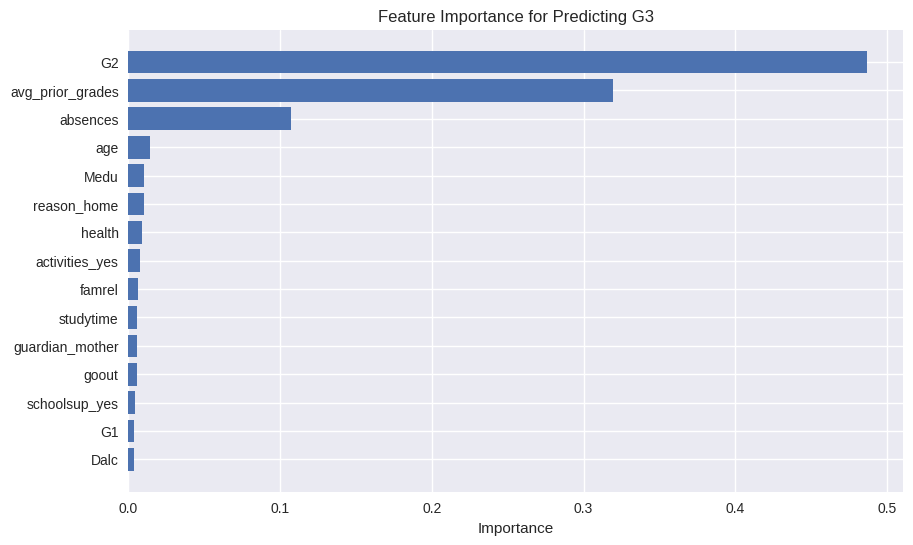

In [69]:
# 2. Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting G3')
plt.gca().invert_yaxis()
plt.show()

In [71]:
# 3. Analyze example predictions (corrected)
y_pred_tuned = best_rf.predict(X_test_selected)
# Get 5 random indices from the test set
example_positions = np.random.choice(range(len(X_test_selected)), 5, replace=False)
# Map to actual test set indices
example_indices = X_test_selected.index[example_positions]
examples = pd.DataFrame({
    'Actual G3': y_test.loc[example_indices],
    'Predicted G3': y_pred_tuned[example_positions],
    'Difference': y_test.loc[example_indices] - y_pred_tuned[example_positions]
})
print("\nExample Predictions:\n", examples)


Example Predictions:
      Actual G3  Predicted G3  Difference
312         11     11.092028   -0.092028
77          11     10.961944    0.038056
175          9      9.624279   -0.624279
5           15     15.452436   -0.452436
376         15     13.820000    1.180000


In [72]:
# 4. Key features for a single example
example_idx = example_indices[0]
example_features = X_test_selected.loc[example_idx]
print(f"\nKey Features for Example (Index {example_idx}):")
print(example_features[feature_importance['Feature'].head(5)])


Key Features for Example (Index 312):
G2                  0.126834
avg_prior_grades    0.403118
absences           -0.388852
age                 1.800852
Medu               -1.610699
Name: 312, dtype: object


#### **Analysis of Results**

1. **Feature Importance:**
    - **G2 (0.4866):** The second period grade is the dominant predictor, explaining nearly half of the model’s decisions. This aligns with its high correlation (0.91) with G3, confirming that mid-term performance strongly predicts final outcomes.
    - **avg_prior_grades (0.3193):** The engineered feature (mean of G1 and G2) is the second most important, suggesting it captures complementary information about prior academic consistency. However, its high importance alongside G2 raises concerns about redundancy.
    - **absences (0.1073):** Surprisingly impactful, indicating that attendance significantly influences G3, even after capping outliers. This suggests a non-linear effect not fully captured in EDA correlations.
    - **age (0.0143), Medu (0.0105), reason_home (0.0104):** These have moderate importance, implying older students, maternal education, and choosing a school for proximity slightly affect performance.
    - **Lower Importance Features:** Study time, health, goout, Dalc, and categorical variables (e.g., guardian_mother, schoolsup_yes) contribute minimally (<0.01 each), suggesting limited direct influence on G3 in the model.
    - ***Insight:*** The model heavily relies on academic features (G2, avg_prior_grades), with absences as a key behavioral factor. The low importance of G1 (0.0038) is unexpected given its correlation (0.79), possibly overshadowed by G2 and avg_prior_grades.
2. **Feature Importance Plot:**
    - The horizontal bar plot shows G2 as the tallest bar, followed by avg_prior_grades, with absences a distant third. Other features have much smaller bars, visually emphasizing the dominance of academic predictors.
    - ***Insight:*** The plot underscores that interventions should focus on sustaining mid-term performance (G2) and ensuring attendance, as other factors play a smaller role.

#### **Key Insights:**

1. **Academic Performance Drives Outcomes:** G2 and prior grades (G1, G2 average) are the strongest predictors of final math grades (G3), explaining ~80% of the model’s predictive power. Mid-term performance is a critical checkpoint for success.
2. **Attendance Matters:** Absences emerged as a significant factor, suggesting that consistent school attendance is crucial for maintaining grades, even after controlling for outliers.
3. **Demographic and Behavioral Factors:** Maternal education and student age have modest effects, with older students slightly underperforming. Lifestyle factors like study time, going out, or alcohol consumption have minimal direct impact in the model.
4. **Model Reliability:** The tuned Random Forest achieves an RMSE of ~1.65 and R² of ~0.867, accurately predicting most grades within 1 point. Errors are larger for high performers, possibly due to unmodeled external factors.
5. **Feature Redundancy:** The high importance of avg_prior_grades alongside G2 suggests potential overlap, which could be streamlined in future iterations.

#### **Educational Recommendations:**

- **Early Intervention Based on G2:** Schools should monitor second period grades (G2) closely, as they strongly predict final outcomes. Tutoring or support programs for students with low G2 scores could prevent poor final grades.
- **Promote Attendance:** Implement attendance tracking and engagement initiatives, as absences significantly impact performance. Incentives for consistent attendance or counseling for frequent absentees could help.
- **Target At-Risk Groups:** Older students may need tailored support, possibly due to external responsibilities or disengagement. Schools could offer mentorship or flexible scheduling for these students.
- **Parental Engagement:** While maternal education has a modest effect, programs to involve parents with lower education levels (e.g., workshops, communication tools) could indirectly boost student performance.
- **Focus Resources Efficiently:** Lifestyle factors like study time or extracurriculars showed limited impact, so resources may be better allocated to academic support rather than broad behavioral interventions.

## **Conclusion**
This project successfully developed a Random Forest model to predict final math grades (G3) with high accuracy, leveraging academic, demographic, and behavioral features from the Math-Students dataset. The model’s insights emphasize the primacy of mid-term grades and attendance, offering clear pathways for educators to improve student outcomes. Future work could explore handling zero-inflated G3 values or incorporating interaction terms to capture nuanced effects, further enhancing predictive power.